In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from fbprophet import Prophet

In [2]:
sneaker_transactions = pd.read_csv('sneaker_transactions.csv')

In [3]:
rand_subset = sneaker_transactions.sample(100000)

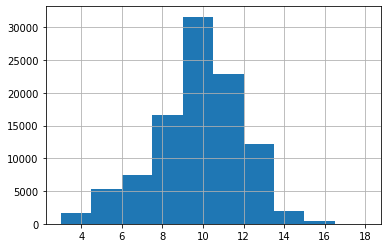

In [4]:
rand_subset.shoeSize.hist()

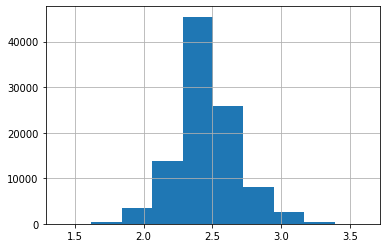

In [5]:
np.log10(rand_subset.localAmount).hist()

In [6]:
rand_subset.createdAt = rand_subset.createdAt.str.replace('T', ' ')

In [7]:
oneshoe = sneaker_transactions[sneaker_transactions['sku'] == 'd4850672-2ab7-4fe5-9185-aaee302c2111']
oneshoe.createdAt = oneshoe.createdAt.str.replace('T', ' ')

/Users/allenchang/PycharmProjects/insight/venv/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [8]:
oneshoe.head()

,Unnamed: 0,sku,localAmount,createdAt,localCurrency,shoeSize
265391,0,d4850672-2ab7-4fe5-9185-aaee302c2111,229.0,2019-06-10 15:46:31+00:00,USD,4.0
265392,1,d4850672-2ab7-4fe5-9185-aaee302c2111,226.0,2019-06-10 14:54:53+00:00,USD,6.0
265393,2,d4850672-2ab7-4fe5-9185-aaee302c2111,225.0,2019-06-10 14:21:04+00:00,USD,5.5
265394,3,d4850672-2ab7-4fe5-9185-aaee302c2111,260.0,2019-06-10 13:41:01+00:00,USD,9.5
265395,4,d4850672-2ab7-4fe5-9185-aaee302c2111,278.0,2019-06-10 13:12:32+00:00,USD,8.5


In [9]:
new = oneshoe["createdAt"].str.split(" ", n = 1, expand = True) 
oneshoe['day'] = new[0]
oneshoe['time'] = new[1]

/Users/allenchang/PycharmProjects/insight/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/allenchang/PycharmProjects/insight/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [10]:
oneshoe.head()

,Unnamed: 0,sku,localAmount,createdAt,localCurrency,shoeSize,day,time
265391,0,d4850672-2ab7-4fe5-9185-aaee302c2111,229.0,2019-06-10 15:46:31+00:00,USD,4.0,2019-06-10,15:46:31+00:00
265392,1,d4850672-2ab7-4fe5-9185-aaee302c2111,226.0,2019-06-10 14:54:53+00:00,USD,6.0,2019-06-10,14:54:53+00:00
265393,2,d4850672-2ab7-4fe5-9185-aaee302c2111,225.0,2019-06-10 14:21:04+00:00,USD,5.5,2019-06-10,14:21:04+00:00
265394,3,d4850672-2ab7-4fe5-9185-aaee302c2111,260.0,2019-06-10 13:41:01+00:00,USD,9.5,2019-06-10,13:41:01+00:00
265395,4,d4850672-2ab7-4fe5-9185-aaee302c2111,278.0,2019-06-10 13:12:32+00:00,USD,8.5,2019-06-10,13:12:32+00:00


In [11]:
prophet_data = oneshoe.loc[:, ('day', 'sku')]

In [12]:
prophet_data.head()

,day,sku
265391,2019-06-10,d4850672-2ab7-4fe5-9185-aaee302c2111
265392,2019-06-10,d4850672-2ab7-4fe5-9185-aaee302c2111
265393,2019-06-10,d4850672-2ab7-4fe5-9185-aaee302c2111
265394,2019-06-10,d4850672-2ab7-4fe5-9185-aaee302c2111
265395,2019-06-10,d4850672-2ab7-4fe5-9185-aaee302c2111


In [13]:
p = prophet_data.day.value_counts()

In [14]:
prophet_df = pd.Series.to_frame(p)
prophet_df['ds'] = list(p.index)

In [15]:
prophet_df = prophet_df.rename(columns={"day":'count', 'ds':'ds'})

In [16]:
prophet_df = prophet_df.sort_values('ds')

In [17]:
prophet_df['count_orig'] = prophet_df['count']
prophet_df['y'] = np.log(prophet_df['count'])

In [18]:
prophet_df.head()

,count,ds,count_orig,y
2018-04-19,40,2018-04-19,40,3.688879
2018-04-20,398,2018-04-20,398,5.986452
2018-04-21,287,2018-04-21,287,5.659482
2018-04-22,282,2018-04-22,282,5.641907
2018-04-23,259,2018-04-23,259,5.556828


In [19]:
model = Prophet()

In [20]:
model.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
future_data = model.make_future_dataframe(periods=30, freq = 'd')

In [22]:
forecast_data = model.predict(future_data)

In [23]:
forecast_data = model.predict(future_data)

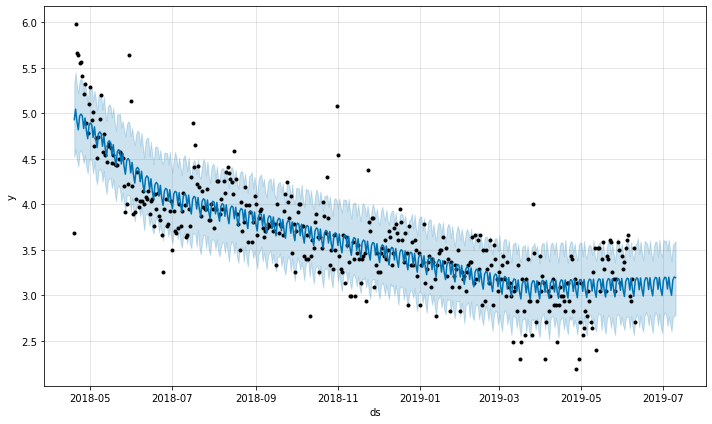

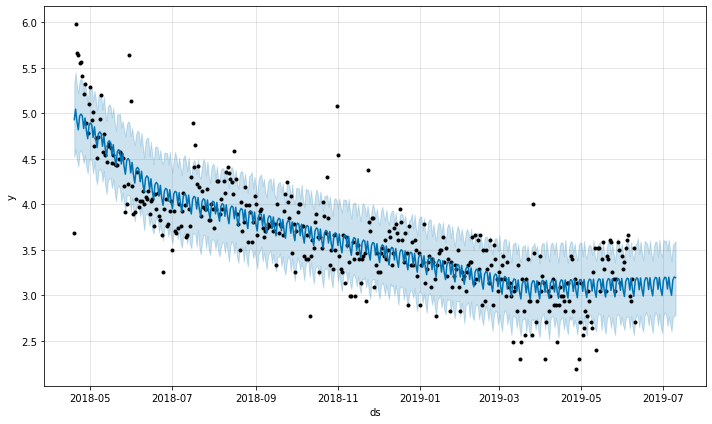

In [24]:
model.plot(forecast_data)

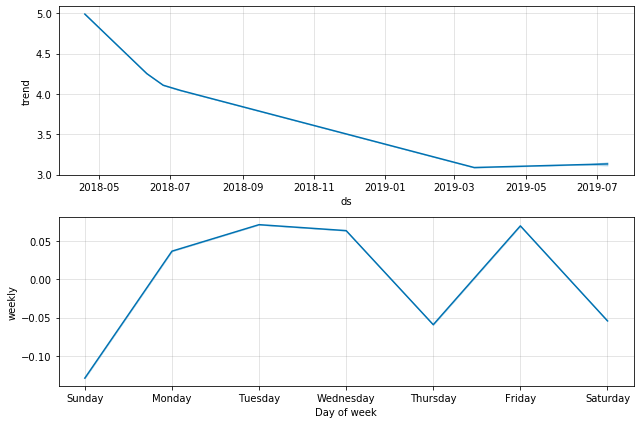

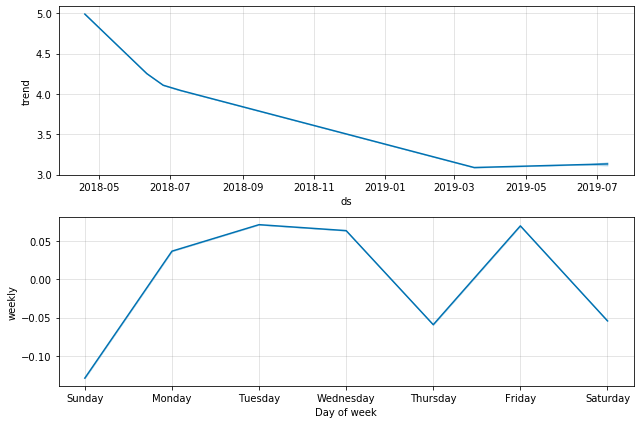

In [25]:
model.plot_components(forecast_data)